## BÜYÜK TEKNOLOJİ FİRMALARI HİSSE SENETLERİ FİYATLARININ TEKNOLOJİ ENDEKSİNİ (XNTK) AÇIKLAMA GÜCÜ

### 1. Giriş


### 2. Analizin Amacı


### 3. Veri Gösterimi

### 4. Veri Temizleme

### 5. Veri Keşfi

### 6. Veri Görselleştirme

### 7. Özellik Mühendisliği(PCA)

## 8. Sonuç


## 1. Giriş:



Şirket analizlerinin yapılmasında ki temel faktörler, şirketin geçmiş dönemlerde ki performansları ve mevcut döneme ait verileri incelenerek gelecek hakkında tahminlerde bulunmaktır. Böylece söz konusu şirketin hisse senetlerine yatırım yapılıp yapılmayacağı kararı daha sağlıklı bir şekilde verilecektir. Bu çalışmada bir tahmin değil ama finansal bir başlangıç olarak Yahoo Finance sitesinden alınan çeşitli firmaların 2010-2018 yılları arasında aylık hisse senedi kapanış fiyatları incelenmiş, bu firmaların hisse senedi fiyatlarının XNTK endeksini açıklama gücü üzerine özellik mühendisliği kullanılarak temel düzeyde bir  çalışma yapılmıştır.

XNTK :ABD'de listelenen büyük başlıklı elektronik tabanlı teknoloji şirketlerinin eşit ağırlıklı bir endeksi. XNTK tamamen elektronik tabanlı teknoloji şirketlerinden oluşmaktadır.

# 2. Analizin Amacı: 
Çeşitli teknoloji hisse senetleri hakkında - Yahoo Finance sitesinden Google, Apple, Microsoft, İbm ve İntel teknoloji firmalarının 2010-2018 yılları arasında aylık kapanış fiyatlarının incelenmesi ve temel bileşenler analizi sonucunda elde edilen bileşenlerin XNTK'ya benzerliğinin gösterimi.

# 3. Veri Gösterimi

Apple, IBM, Google, Microsoft ve İntel firmalarının 2010-2018 yılları arasındaki aylık kapanış fiyatları tek veri setinde

birleştirilmiş,  daha sonra XNTK endeksi kapanış fiyatları veri seti de çalışmaya dahil edilerek kullanılmıştır.

**AAPL**: Apple firmasının kapanış fiyatı

**IBM**: IBM firmasının kapanış fiyatı

**GOOG**: Google firmasının kapanış fiyatı

**MSFT**: Microsoft firmasının kapanış fiyatı

**INTEL**:İntel firmasının kapanış fiyatı

**XNTK**: XNTK endeksinin kapanış fiyatı


# Kütüphaneleri çağıralım.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt 
%matplotlib
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

Using matplotlib backend: Qt5Agg


### 3. Veri Gösterimi

**Veri setlerimizi çağırıyoruz ve ilk 10 değerini inceliyoruz.**

In [2]:
aapl = pd.read_csv('C:\\Users\\Pc\\Desktop\\AAPL.csv')
ibm =pd.read_csv('C:\\Users\\Pc\\Desktop\\IBM.csv')
google=pd.read_csv('C:\\Users\\Pc\\Desktop\\GOOG.csv')
msft=pd.read_csv('C:\\Users\\Pc\\Desktop\\MSFT.csv')
intel=pd.read_csv('C:\\Users\\Pc\\Desktop\\INTC.csv')

In [3]:
data = pd.DataFrame({"DATE" : aapl["Date"],
                        "AAPL": aapl["Close"],
                       "IBM" : ibm["Close"],
                       "GOOG": google["Close"],
                      "MSFT": msft["Close"],
                      "INTEL": intel["Close"]})
 
data.head(10)

,DATE,AAPL,IBM,GOOG,MSFT,INTEL
0,2010-03-01,nan,nan,nan,nan,nan
1,2010-04-01,37.299,129.000,261.151,30.540,22.840
2,2010-05-01,36.697,125.260,241.246,25.800,21.420
3,2010-06-01,35.933,123.480,221.037,23.010,19.450
4,2010-07-01,36.750,128.400,240.858,25.810,20.600
5,2010-08-01,34.729,123.130,223.556,23.470,17.670
6,2010-09-01,40.536,134.140,261.196,24.490,19.200
7,2010-10-01,42.997,143.600,304.867,26.670,20.050
8,2010-11-01,44.450,141.460,276.060,25.260,21.160
9,2010-12-01,46.080,146.760,295.066,27.910,21.030


**Veri setimizin son 5 değerini inceliyoruz**

In [4]:
data.tail()

,DATE,AAPL,IBM,GOOG,MSFT,INTEL
92,2017-11-01,171.850,149.120,1021.410,84.170,44.840
93,2017-12-01,169.230,153.420,1046.400,85.540,46.160
94,2018-01-01,167.430,163.700,1169.940,95.010,48.140
95,2018-02-01,178.120,155.830,1104.730,93.770,49.290
96,2018-03-01,167.780,153.430,1031.790,91.270,52.080


**Kolonlarımızı ve veri tiplerimizi gözlemliyoruz.**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 6 columns):
DATE     97 non-null object
AAPL     96 non-null float64
IBM      96 non-null float64
GOOG     96 non-null float64
MSFT     96 non-null float64
INTEL    96 non-null float64
dtypes: float64(5), object(1)
memory usage: 4.6+ KB



**Sürekli Değişkenler: AAPL, IBM, GOOG, MSFT, INTEL**

# 4. Veri Temizleme

**Veri setindeki eksik verilere bakıyoruz**

In [6]:
data.isnull().sum()*100/data.count()

DATE    0.000
AAPL    1.042
IBM     1.042
GOOG    1.042
MSFT    1.042
INTEL   1.042
dtype: float64

In [ ]:
Eksik değerler oldukça az.

In [7]:
data=data.dropna()

Veride aykırı değer var mı bakıyoruz.

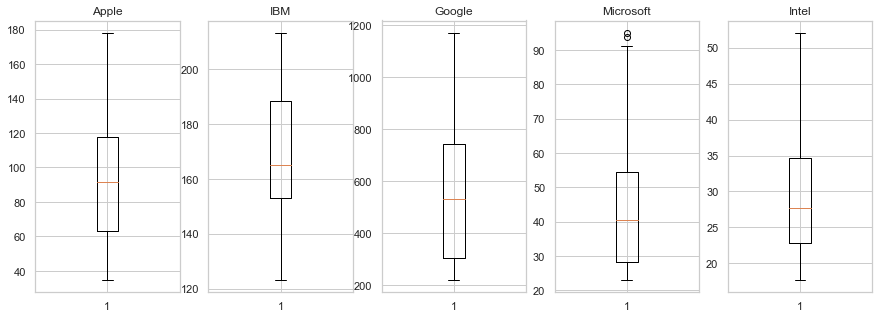

In [9]:
plt.figure(figsize = (15,5))

plt.subplot(1,5,1)
plt.boxplot(data['AAPL'])
plt.title("Apple")

plt.subplot(1,5,2)
plt.boxplot(data['IBM'])
plt.title("IBM")

plt.subplot(1,5,3)
plt.boxplot(data['GOOG'])
plt.title("Google")

plt.subplot(1,5,4)
plt.boxplot(data['MSFT'])
plt.title("Microsoft")

plt.subplot(1,5,5)
plt.boxplot(data['INTEL'])
plt.title("Intel")
plt.show()

Microsoft verisi hariç aykırı değer bulunmamaktadır. Microsoft verisinde kaç tane aykırı değer olduğunu anlamak için Tukey testi uyguladım.

In [10]:
q75, q25 = np.percentile(data["MSFT"], [75 ,25])
caa= q75 - q25
esik_degerleri=pd.DataFrame(columns=('esik_degeri', 'aykiri_deger_sayisi'))
for esik_degeri in np.arange(1,5,0.5):
    min_deger = q25 - (caa*esik_degeri)
    maks_deger = q75 + (caa*esik_degeri)
    aykiri_deger_sayisi = len((np.where((data["MSFT"] > maks_deger)| 
                                       (data["MSFT"] < min_deger))[0]))
    esik_degerleri = esik_degerleri.append({'esik_degeri': esik_degeri,'aykiri_deger_sayisi': aykiri_deger_sayisi}, 
                                           ignore_index=True)
esik_degerleri

,esik_degeri,aykiri_deger_sayisi
0,1.000,6.000
1,1.500,2.000
2,2.000,0.000
3,2.500,0.000
4,3.000,0.000
5,3.500,0.000
6,4.000,0.000
7,4.500,0.000


Tukey testine göre toplam 8 tane aykırı değer var. Aykırı değer sayısı az ama analizde görmek için winsorize uyguladım.

Text(0.5, 1.0, 'Winsorize Microsoft')

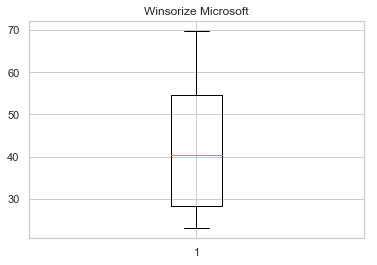

In [11]:
data['wins_msft'] = winsorize(data["MSFT"], (0, 0.10))
plt.boxplot(data['wins_msft'])
plt.title("Winsorize Microsoft")

Aykırı değerlerden kurtulmuş olduk.

## 5. Veri Keşfi

**Tanımlayıcı İstatistik**

In [12]:
print(data.describe())

         AAPL     IBM     GOOG   MSFT  INTEL  wins_msft
count  96.000  96.000   96.000 96.000 96.000     96.000
mean   93.264 168.534  545.368 43.787 29.130     42.471
std    37.254  22.876  245.781 18.158  7.497     15.295
min    34.729 123.130  221.037 23.010 17.670     23.010
25%    63.250 153.140  306.562 28.383 22.795     28.383
50%    91.679 165.195  531.852 40.400 27.720     40.400
75%   117.445 188.458  742.687 54.535 34.718     54.535
max   178.120 213.300 1169.940 95.010 52.080     69.840


En yüksek hisse senedi fiyatı ortalamasına sahip teknoloji firması 545.368 ile Google. En düşük hisse senedi fiyatı ortalamasına sahip firma 43.787 ile Microsoft. Standart sapmalara bakıldığında Google hisse senedi fiyatının değişkenliği fazladır. 

## 6. Veri Görselleştirme

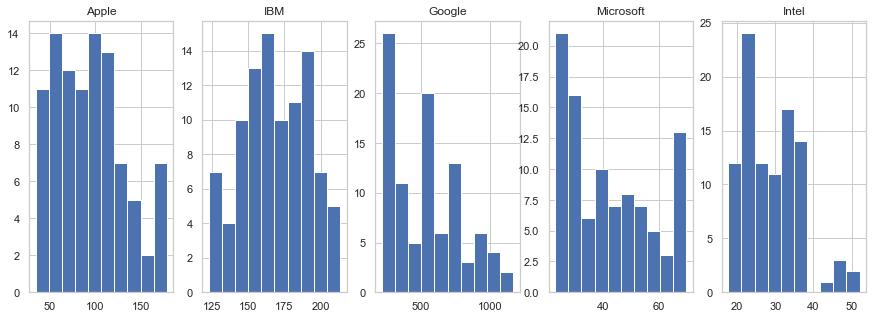

In [13]:
plt.figure(figsize = (15,5))

plt.subplot(1,5,1)
plt.hist(data['AAPL'])
plt.title("Apple")

plt.subplot(1,5,2)
plt.hist(data['IBM'])
plt.title("IBM")

plt.subplot(1,5,3)
plt.hist(data['GOOG'])
plt.title("Google")

plt.subplot(1,5,4)
plt.hist(data['wins_msft'])
plt.title("Microsoft")

plt.subplot(1,5,5)
plt.hist(data['INTEL'])
plt.title("Intel")
plt.show()


Apple ve IBM verilerinin dağılımı birbirine benzemektedir. İntel kapanış fiyatları farklı aralıklarda yoğunluk göstermiş. İntel'in hisse senedi kapanış fiyatlarında zıplamalar vardır.

# Apple firmasının yıllara göre kapanış fiyatının grafiği

Text(0, 0.5, 'Apple')

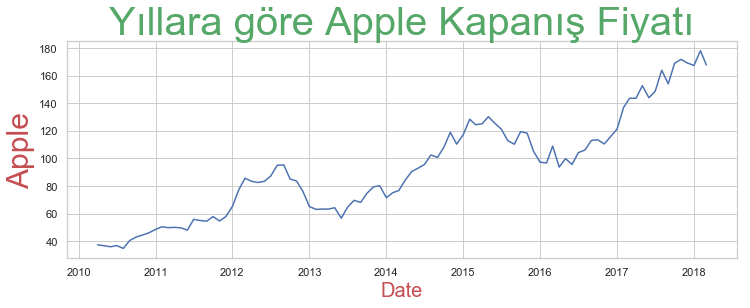

In [14]:
data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data.index = data['DATE']

#plot
plt.figure(figsize=(12,4))
plt.plot(data['AAPL'], label='Close Price history')
plt.title("Yıllara göre Apple Kapanış Fiyatı",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Apple",fontsize=30,color='r')


Apple yıllara göre artış trendinde bir grafik gösteriyor. 

# Google firmasının yıllara göre kapanış fiyatının grafiği

Text(0, 0.5, 'Google')

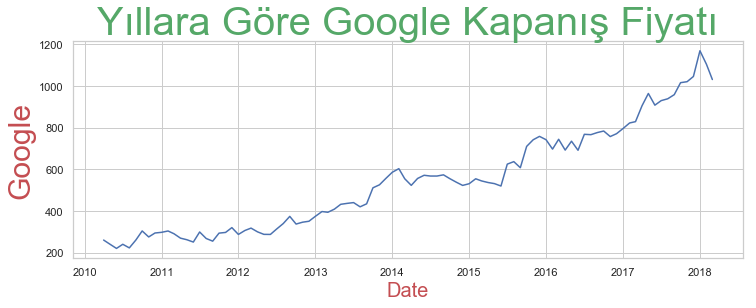

In [15]:
plt.figure(figsize=(12,4))
plt.plot(data['GOOG'], label='Close Price history')
plt.title("Yıllara Göre Google Kapanış Fiyatı",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Google",fontsize=30,color='r')

# IBM firmasının yıllara göre kapanış fiyatının grafiği

Text(0, 0.5, 'IBM')

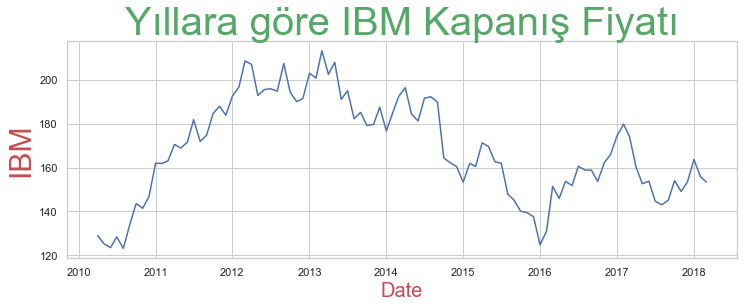

In [16]:
plt.figure(figsize=(12,4))
plt.plot(data['IBM'], label='Close Price history')
plt.title("Yıllara göre IBM Kapanış Fiyatı",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("IBM",fontsize=30,color='r')

IBM kapanış fiyatları 2016 yılında bir kırılma yaşamış. Bakıldığında artan azalan bir grafik var ama son gelinen fiyat başlangıç fiyatından yüksek.

# Microsoft firmasının yıllara göre kapanış fiyatının grafiği

Text(0, 0.5, 'Microsoft')

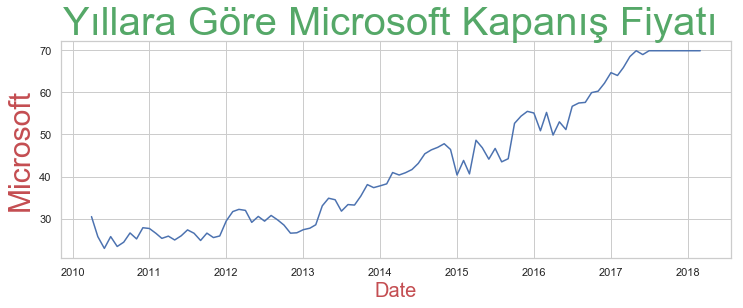

In [17]:
plt.figure(figsize=(12,4))
plt.plot(data['wins_msft'], label='Close Price history')
plt.title("Yıllara Göre Microsoft Kapanış Fiyatı ",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Microsoft",fontsize=30,color='r')

# İntel firmasının yıllara göre kapanış fiyatının grafiği

Text(0, 0.5, 'İntel')

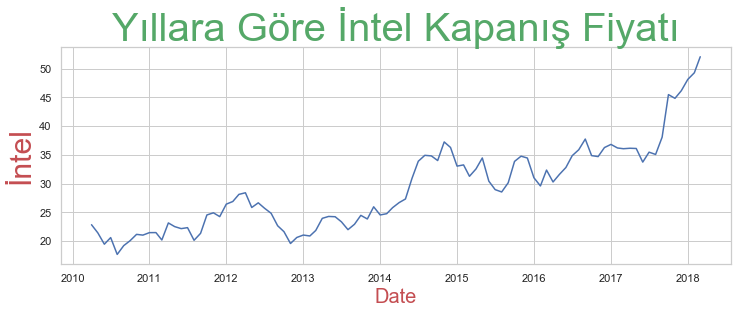

In [18]:
plt.figure(figsize=(12,4))
plt.plot(data['INTEL'], label='Close Price history')
plt.title("Yıllara Göre İntel Kapanış Fiyatı",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("İntel",fontsize=30,color='r')

**Değişkenler arasındaki korelasyon**

In [19]:
cormat = data.corr()
cormat

,AAPL,IBM,GOOG,MSFT,INTEL,wins_msft
AAPL,1.000,-0.181,0.901,0.918,0.914,0.913
IBM,-0.181,1.000,-0.314,-0.335,-0.246,-0.345
GOOG,0.901,-0.314,1.000,0.976,0.893,0.975
MSFT,0.918,-0.335,0.976,1.000,0.940,0.973
INTEL,0.914,-0.246,0.893,0.940,1.000,0.909
wins_msft,0.913,-0.345,0.975,0.973,0.909,1.000


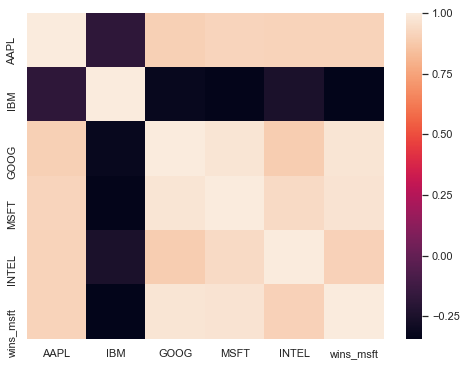

In [20]:
plt.figure(figsize = (8,6))
sns.heatmap(cormat)
plt.show()

IBM firması hariç diğer değişkenlerde yüksek korelasyon mevcut. IBM firmasında korelasyon - lerde ve çok düşük.

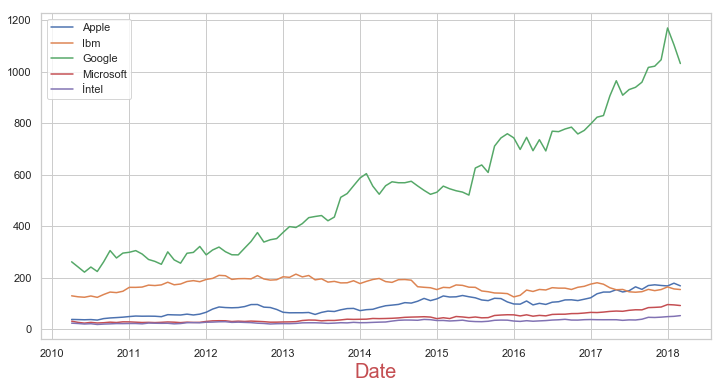

In [21]:
fig = plt.figure(figsize = (12, 6))

data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data.index = data['DATE']
data['AAPL'].plot(label = 'Apple')
data['IBM'].plot(label = 'Ibm')
data['GOOG'].plot(label = 'Google')
data['MSFT'].plot(label = 'Microsoft')
data['INTEL'].plot(label = 'İntel')
plt.xlabel("Date",fontsize=20,color='r')
plt.legend()

In [ ]:
Grafikten de görüldüğü gibi Google hisse senetleri diğerlerine göre oldukça hareketli bir artış gösteriyor.

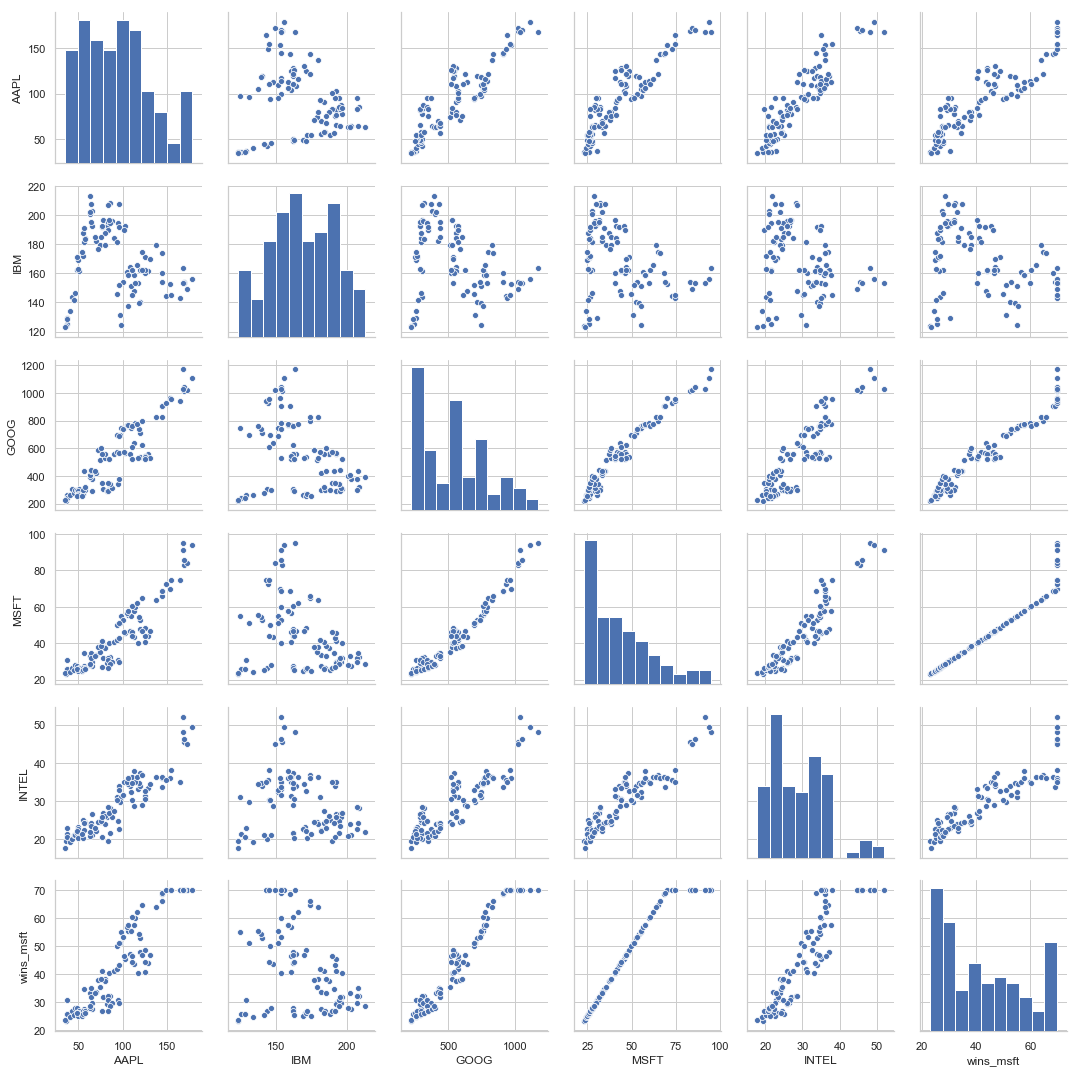

In [22]:
sns.pairplot(data)

IBM hisse senetleri dışında bütün hisse senetlerinin arasında lineerlik var. Yüksek korelasyona sahipler

# XNTK endeksinin kapanış fiyatları verisini ele alalım

In [23]:
xntk=pd.read_csv('C:\\Users\\Pc\\Desktop\\XNTK.csv')
xntk = pd.DataFrame({"DATE" : aapl["Date"],
                        "XNTK": xntk["Close"],
                      })

 
xntk.head()

,DATE,XNTK
0,2010-03-01,26.570
1,2010-04-01,27.890
2,2010-05-01,29.900
3,2010-06-01,29.845
4,2010-07-01,27.565


In [24]:
xntk.tail()

,DATE,XNTK
92,2017-11-01,78.280
93,2017-12-01,83.790
94,2018-01-01,84.620
95,2018-02-01,83.810
96,2018-03-01,92.300


In [25]:
xntk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
DATE    97 non-null object
XNTK    97 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Eksik değer var mı bakıyoruz

In [26]:
xntk.isnull().sum()*100/xntk.count()

DATE   0.000
XNTK   0.000
dtype: float64

Eksik değer yok.

**Aykırı değerlere bakalım.**

Text(0.5, 1.0, 'XNTK')

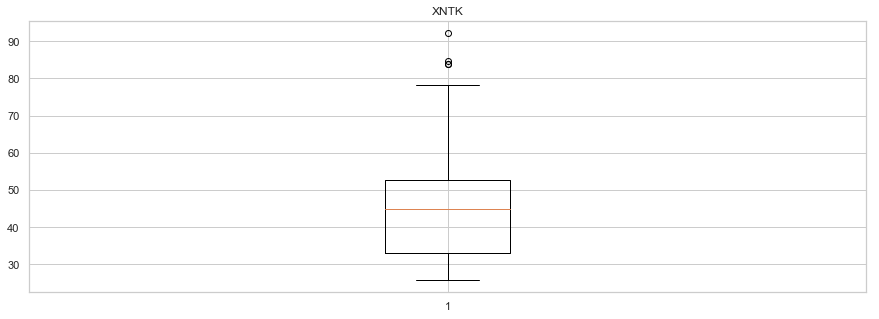

In [27]:
plt.figure(figsize = (15,5))

plt.boxplot(xntk['XNTK'])
plt.title("XNTK")

Winsorize yöntemi ile aykırı değerlerden kurtuluyoruz.

Text(0.5, 1.0, 'Winsorize XNTK')

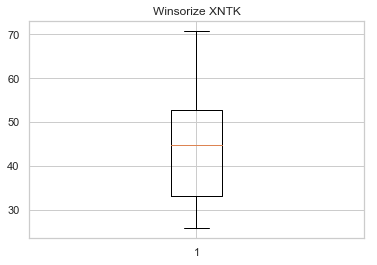

In [28]:
xntk['wins_xntk'] = winsorize(xntk["XNTK"], (0, 0.10))
plt.boxplot(xntk['wins_xntk'])
plt.title("Winsorize XNTK")

In [ ]:
XNTK endeksinin yıllara göre kapanış fiyatının grafiği

Text(0, 0.5, 'XNTK')

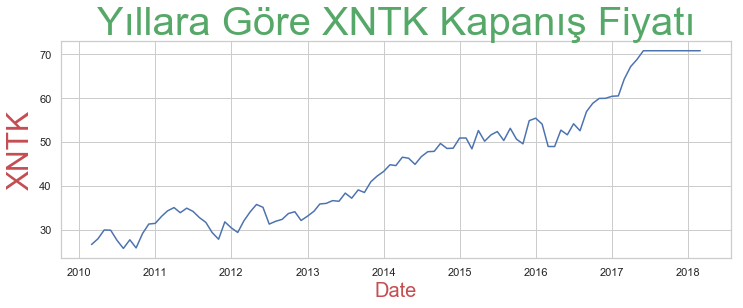

In [29]:
xntk['DATE'] = pd.to_datetime(xntk.DATE,format='%Y-%m-%d')
xntk.index = xntk['DATE']

#plot
plt.figure(figsize=(12,4))
plt.plot(xntk['wins_xntk'], label='Close Price history')
plt.title("Yıllara Göre XNTK Kapanış Fiyatı",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("XNTK",fontsize=30,color='r')

## 7. Özellik Mühendisliği

In [30]:
X =data.iloc[:,1:6]
print (X)

              AAPL     IBM     GOOG   MSFT  INTEL
DATE                                             
2010-04-01  37.299 129.000  261.151 30.540 22.840
2010-05-01  36.697 125.260  241.246 25.800 21.420
2010-06-01  35.933 123.480  221.037 23.010 19.450
2010-07-01  36.750 128.400  240.858 25.810 20.600
2010-08-01  34.729 123.130  223.556 23.470 17.670
2010-09-01  40.536 134.140  261.196 24.490 19.200
2010-10-01  42.997 143.600  304.867 26.670 20.050
2010-11-01  44.450 141.460  276.060 25.260 21.160
2010-12-01  46.080 146.760  295.066 27.910 21.030
2011-01-01  48.474 162.000  298.240 27.730 21.460
2011-02-01  50.459 161.880  304.718 26.580 21.470
2011-03-01  49.787 163.070  291.484 25.390 20.180
2011-04-01  50.019 170.580  270.292 25.920 23.150
2011-05-01  49.690 168.930  262.801 25.010 22.510
2011-06-01  47.953 171.550  251.554 26.000 22.160
2011-07-01  55.783 181.850  299.894 27.400 22.330
2011-08-01  54.976 171.910  268.732 26.600 20.130
2011-09-01  54.474 174.870  255.856 24.890 21.340


[77.4 18.3  2.2  1.7  0.3]


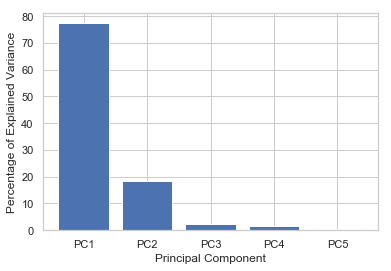

In [31]:
scaled_data = StandardScaler().fit_transform(X)
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1) 
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
print (per_var)
plt.show()

İlk temel bileşen varyansın %77.4 lük kısmını açıklıyor yani ilk temel  bileşeni alıp varyansı açıklayabiliriz.

Yeni bileşen ile endeksin korelasyonuna bakalım

In [35]:
xntks=xntk['wins_xntk']

In [36]:
np.corrcoef(pca_data[:,0],xntks[:-1])

array([[1.        , 0.97051946],
       [0.97051946, 1.        ]])

Korelasyon oldukça yüksek.

Text(0, 0.5, 'XNTK')

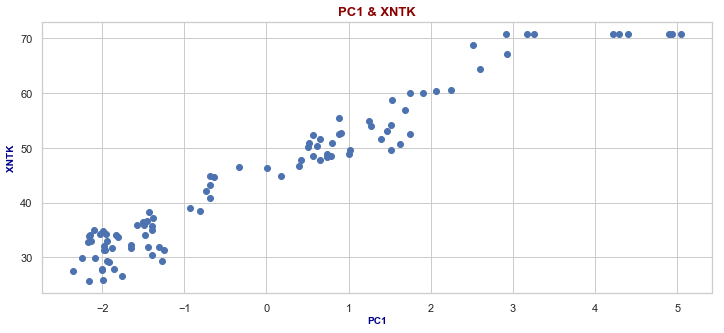

In [37]:
plt.figure(figsize=(12,5))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
plt.scatter(pca_data[:,0], xntks[:-1])
plt.title("PC1 & XNTK", fontdict=baslik_font)
plt.xlabel('PC1', fontdict=eksen_font )
plt.ylabel('XNTK', fontdict=eksen_font )

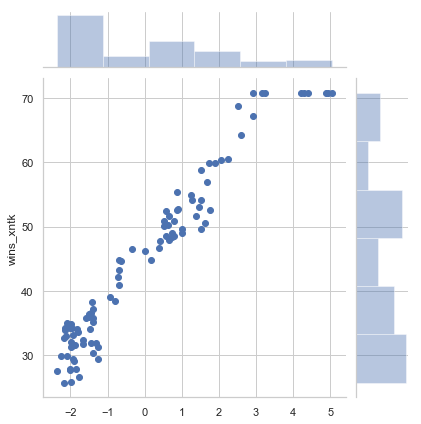

In [38]:
sns.jointplot(pca_data[:,0],xntks[:-1],kind='scatter')

Dağılım grafiğinden PC1 bileşeni ile XNTK endeksi arasında pozitif yönde bir ilişki görüyoruz.

## 8. Sonuç:
5 büyük teknoloji firmasının (Google, Apple, Microsoft, Ibm, İntel) 2010-2018 yılları arasındaki kapanış fiyatları ile bir veri seti oluşturularak keşifsel veri analizleri yapıldı ve grafikleri çizildi. Aralarındaki ilişkiye bakılmış ve IBM firması hariç yüksek korelasyona sahip oldukları görülmüştür. Daha sonra Özellik Mühendisliği olarak PCA uygulanmış ve %77,4'lük varyansın ilk temel bileşen ile açıklandığı tespit edilmiştir. Daha sonra bu temel bileşen ile XNTK endeksinin korelasyonuna bakılmış, pozitif yönde yüksek bir korelasyona sahip olduğu görülmüştür. Sonuç olarak bu 5 firmanın verileriyle analiz yapmak yerine bir tane temel bileşen bize bu firmaların XNTK endeksine etkisini açıklamak için yeterli olabilir.